In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
# Download historical data for TSLA, BND, SPY
assets = ["TSLA", "BND", "SPY"]
data = yf.download(assets, start="2015-07-01", end="2025-07-31")

# Extract only the 'Close' prices
close_prices = data['Close']


/tmp/ipython-input-1498344493.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start="2015-07-01", end="2025-07-31")
[*********************100%***********************]  3 of 3 completed


## Define a Backtesting Period

In [8]:
# Example: Backtesting period from Aug 1, 2024 to Jul 31, 2025
start_date = '2024-08-01'
end_date = '2025-07-31'

# daily prices for TSLA, BND, SPY indexed by date
backtest_prices = close_prices.loc[start_date:end_date]

## Define Benchmark Portfolio

In [5]:
benchmark_weights = {
    'SPY': 0.6,
    'BND': 0.4,
    'TSLA': 0.0  # Not included in benchmark
}
# optimized weights from Task 4
strategy_weights = {
    'TSLA': 0.0,
    'BND': 0.0,
    'SPY': 1.0
}

## Simulate Your Strategy

In [11]:
# Calculate Daily Returns for All Assets
daily_returns = backtest_prices.pct_change().dropna()

# Convert weights to Series for multiplication alignment
strategy_w = pd.Series(strategy_weights)
benchmark_w = pd.Series(benchmark_weights)

In [14]:
# Calculate daily portfolio returns
strategy_returns = daily_returns.dot(strategy_w)
benchmark_returns = daily_returns.dot(benchmark_w)

# Calculate Cumulative Returns
strategy_cum_returns = (1 + strategy_returns).cumprod() - 1
benchmark_cum_returns = (1 + benchmark_returns).cumprod() - 1

## Analyze Performance:

In [15]:
# Calculate Performance Metrics
import numpy as np

def annualized_sharpe(returns, periods_per_year=252, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate/periods_per_year
    return np.sqrt(periods_per_year) * excess_returns.mean() / excess_returns.std()

# Total return over the backtest period
strategy_total_return = strategy_cum_returns.iloc[-1]
benchmark_total_return = benchmark_cum_returns.iloc[-1]

# Annualized Sharpe Ratio
strategy_sharpe = annualized_sharpe(strategy_returns)
benchmark_sharpe = annualized_sharpe(benchmark_returns)


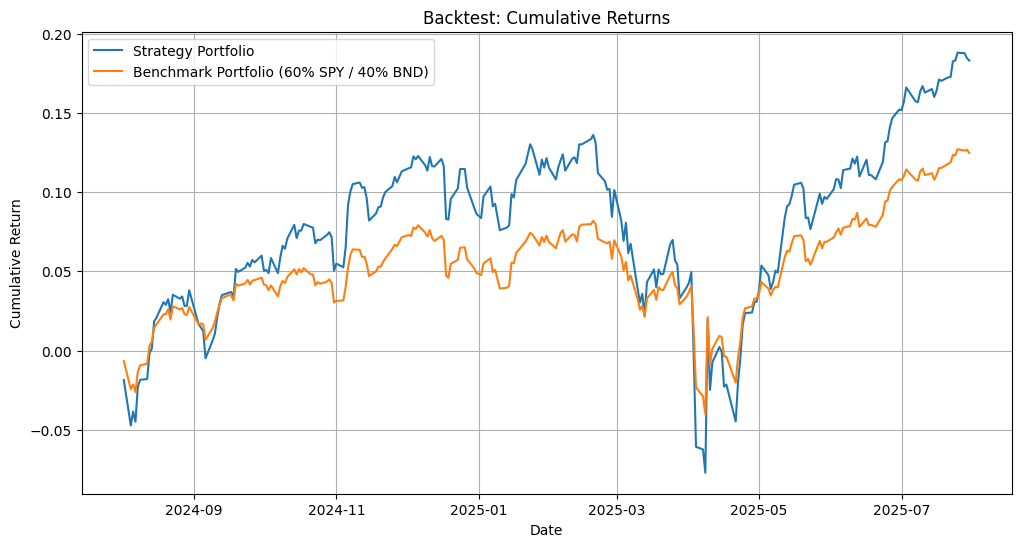

In [16]:
# Plot Cumulative Returns
plt.figure(figsize=(12, 6))
plt.plot(strategy_cum_returns, label='Strategy Portfolio')
plt.plot(benchmark_cum_returns, label='Benchmark Portfolio (60% SPY / 40% BND)')
plt.title('Backtest: Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
#  Summarize Results
print("Strategy Portfolio Total Return: {:.2%}".format(strategy_total_return))
print("Strategy Portfolio Annualized Sharpe Ratio: {:.2f}".format(strategy_sharpe))

print("\nBenchmark Portfolio Total Return: {:.2%}".format(benchmark_total_return))
print("Benchmark Portfolio Annualized Sharpe Ratio: {:.2f}".format(benchmark_sharpe))

if strategy_total_return > benchmark_total_return:
    print("\nThe strategy outperformed the benchmark on total return.")
else:
    print("\nThe strategy did not outperform the benchmark on total return.")

if strategy_sharpe > benchmark_sharpe:
    print("The strategy outperformed the benchmark on risk-adjusted returns (Sharpe Ratio).")
else:
    print("The strategy did not outperform the benchmark on risk-adjusted returns (Sharpe Ratio).")


Strategy Portfolio Total Return: 18.30%
Strategy Portfolio Annualized Sharpe Ratio: 0.94

Benchmark Portfolio Total Return: 12.47%
Benchmark Portfolio Annualized Sharpe Ratio: 1.02

The strategy outperformed the benchmark on total return.
The strategy did not outperform the benchmark on risk-adjusted returns (Sharpe Ratio).
